# 导入包

In [1]:
import torch as t
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
t.__version__

'1.12.1'

In [2]:
mnist = torchvision.datasets.FashionMNIST(root=r"F:\temp\mnist",
                                  train=True,
                                  download=True,
                                  transform=transforms.ToTensor())
mnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: F:\temp\mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
# 查看下mnist的类别
mnist.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

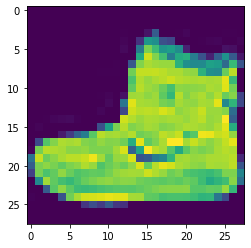

In [4]:
# 查看下mnist的图片
import matplotlib.pyplot as plt
plt.imshow(mnist[0][0].view(28,28).numpy())

In [5]:
# 定义model
class Model(nn.Module):
    def __init__(self, in_features=10, out_features=2):
        super().__init__()
        self.liner1 = nn.Linear(in_features, 128, bias=False)
        self.output = nn.Linear(128, out_features, bias=False)

    def forward(self, x):
        x = x.view(-1, 28*28)
        relu = t.relu(self.liner1(x))
        z = self.output(relu)
        softmax = F.log_softmax(z, dim=1)
        return softmax

In [6]:
def fit(net, batchdata, lr, gamma, epochs):
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr = lr,momentum=gamma)
    correct = 0
    samples = 0
    for epoch in range(epochs):
        for batch_id, (x, y) in enumerate(batchdata):
            y = y.view(x.shape[0])
            forward = net.forward(x)
            loss = criterion(forward, y)
            loss.backward()
            opt.step()
            opt.zero_grad()

            yhat = t.max(forward, 1)[1]
            correct += t.sum(yhat==y)
            samples +=x.shape[0]
            if (batch_id+1) % 125 == 0 or batch_id == len(batchdata)-1:
                print('Epoch{}:[{}/{}({:.0f}%)]\tLoss:{:.6f}\t Accuracy:{:.3f}'.format(
                epoch+1
                ,samples
                ,len(batchdata.dataset)*epochs
                ,100*samples/(len(batchdata.dataset)*epochs)
                ,loss.data.item()
                ,float(correct*100)/samples))
            pass
        pass
    pass


# 训练和评估

In [9]:
# 参数设置
batch_size = 128
lr = 0.2
epochs = 5
gamma = 0

batchdata = DataLoader(mnist, batch_size=batch_size, shuffle=True)
len(batchdata)
input_ = mnist.data[0].numel()
input_
output_ = len(mnist.targets.unique())
output_

10

In [10]:
%%time
t.random.manual_seed(666)
net = Model(in_features=input_, out_features=output_)
fit(net, batchdata, lr, gamma, epochs)

Epoch1:[16000/300000(5%)]	Loss:0.799948	 Accuracy:66.606
Epoch1:[32000/300000(11%)]	Loss:0.554410	 Accuracy:72.041
Epoch1:[48000/300000(16%)]	Loss:0.498571	 Accuracy:74.790
Epoch1:[60000/300000(20%)]	Loss:0.636044	 Accuracy:76.135
Epoch2:[76000/300000(25%)]	Loss:0.458346	 Accuracy:77.603
Epoch2:[92000/300000(31%)]	Loss:0.384422	 Accuracy:78.523
Epoch2:[108000/300000(36%)]	Loss:0.526542	 Accuracy:79.313
Epoch2:[120000/300000(40%)]	Loss:0.375241	 Accuracy:79.856
Epoch3:[136000/300000(45%)]	Loss:0.303937	 Accuracy:80.451
Epoch3:[152000/300000(51%)]	Loss:0.415975	 Accuracy:80.938
Epoch3:[168000/300000(56%)]	Loss:0.508405	 Accuracy:81.342
Epoch3:[180000/300000(60%)]	Loss:0.391182	 Accuracy:81.632
Epoch4:[196000/300000(65%)]	Loss:0.410978	 Accuracy:82.018
Epoch4:[212000/300000(71%)]	Loss:0.550932	 Accuracy:82.334
Epoch4:[228000/300000(76%)]	Loss:0.395312	 Accuracy:82.621
Epoch4:[240000/300000(80%)]	Loss:0.322151	 Accuracy:82.825
Epoch5:[256000/300000(85%)]	Loss:0.403257	 Accuracy:83.055
Epoc